Import Libraries

In [1]:
#importing nessessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [2]:
#import warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

Dataset Loading

The datasets were in json format. We converted all four files into csv format and then marged them into one single file named 'dblp-ref-small.csv'

In [3]:
df = pd.read_csv('dblp-ref-small.csv')
# Just to take a glimpse of the dataset
df.head()

authors  n_citation  \
0                  ['Tegegne Marew', 'Doo-Hwan Bae']           1   
1  ['Lei Zhang', 'Xuan Zhang', 'Meiping Chai', 'Y...           2   
2                        ['Dongyun Liu', 'Hong Mei']          39   
3                ['N. Sai Shankar', 'Sunghyun Choi']          50   
4  ['C. Graciani Díaz', 'Francisco-Jesús Martín-M...          50   

                                          references  \
0  ['2134bf3b-fd89-4724-90ce-5993b4fa3218', '906c...   
1  ['3e3b524c-70c5-4008-b349-fd7ae950e655', '4929...   
2  ['4b837f17-7e38-4175-82bc-daa37f162933', '65ac...   
3                                                NaN   
4           ['c17481ca-9511-4793-8dad-a2486e0b2713']   

                                               title  \
0  Using Classpects for Integrating Non-Functiona...   
1  Solution Proposals for Japan-Oriented Offshore...   
2  Mapping Requirements to Software Architecture ...   
3  QoS Signaling for Parameterized Traffic in IEE...   
4  Specification of Adleman's Restricted Model Us...   

                                              venue  year  \
0  international conference on software engineering  2006   
1  international conference on software engineering  2009   
2  international conference on software engineering  2003   
3                 Lecture Notes in Computer Science  2002   
4                 Lecture Notes in Computer Science  2002   

                                     id  \
0  01f1d231-80ae-4cce-b56c-9d821e0924d0   
1  0e6ce7a9-6456-437b-9f3f-4bda192a6fae   
2  10c7185a-f2b7-4810-b1d6-1340c2949922   
3  11f0bd37-ae5a-43e6-b14a-a59bc00fdd90   
4  155dec16-36d6-44f4-976b-1afb5d1924af   

                                            abstract  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3  IEEE 802.11e Medium Access Control (MAC) is an...  
4  The aim of this paper is to develop an executa...

Here, we can see that, 'authors' columns is for authors collaboration and not for unique author.

In [4]:
#dimension of the dataframe
df.shape

(51956, 8)

Data Characteristics

In [5]:
#types of each columns
print(df.dtypes)
print(type(df))

authors       object
n_citation     int64
references    object
title         object
venue         object
year           int64
id            object
abstract      object
dtype: object
<class 'pandas.core.frame.DataFrame'>


Here, only 'n_citation' and 'year' is in integer form.

In [6]:
#null checking ofeach columns
print(df.isnull().sum())

authors           0
n_citation        0
references    13430
title             0
venue             0
year              0
id                0
abstract       7642
dtype: int64


There are 13430 null values for 'references' and '7642' null values for 'abstract' column. All the rest are filled with values.

In [7]:
#Brief discription of the dataframe through each column
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe(include = 'all')

authors  n_citation references  \
count                  51956    51956.00      38526   
unique                 46752         NaN      35539   
top     ['Peter G. Neumann']         NaN         []   
freq                      73         NaN       2605   
mean                     NaN       43.14        NaN   
std                      NaN      187.91        NaN   
min                      NaN        0.00        NaN   
25%                      NaN        0.00        NaN   
50%                      NaN       14.00        NaN   
75%                      NaN       50.00        NaN   
max                      NaN    18861.00        NaN   

                                           title  \
count                                      51956   
unique                                     51940   
top     President's letter to the ACM membership   
freq                                           3   
mean                                         NaN   
std                                          NaN   
min                                          NaN   
25%                                          NaN   
50%                                          NaN   
75%                                          NaN   
max                                          NaN   

                                    venue     year  \
count                               51956 51956.00   
unique                                  4      NaN   
top     Lecture Notes in Computer Science      NaN   
freq                                32137      NaN   
mean                                  NaN  2003.34   
std                                   NaN    10.00   
min                                   NaN  1958.00   
25%                                   NaN  2001.00   
50%                                   NaN  2005.00   
75%                                   NaN  2007.00   
max                                   NaN  2017.00   

                                          id  \
count                                  51956   
unique                                 51956   
top     01f1d231-80ae-4cce-b56c-9d821e0924d0   
freq                                       1   
mean                                     NaN   
std                                      NaN   
min                                      NaN   
25%                                      NaN   
50%                                      NaN   
75%                                      NaN   
max                                      NaN   

                                                 abstract  
count                                               44314  
unique                                              44297  
top     © 2014 IEEE. Personal use of this material is ...  
freq                                                    5  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

As 'references' and 'abstract' are null values. So, those should be preprocessed. 'id' is unique for every row and it means the paper's id. 46752 unique author collaboration is presented. There are 4 venues. We can not find any unique value for 'year'. But the author simulation is from 1958 to 2017 A.C. 50% data is before 2005 A.C. 

Evaluation Data Analysis (EDA)

In [8]:
#finding the number of data before and after 2006
early=df[df['year']>=2006]
late=df[df['year']<2006]
print("Paper_published_after_2006: ",len(late))
print("Paper_published_before_2006: ",len(early))

Paper_published_after_2006:  30897
Paper_published_before_2006:  21059


In [9]:
#analysing correlation between columns
df.corr()

n_citation  year
n_citation        1.00 -0.11
year             -0.11  1.00

Only those two columns are in int64 form. Other columns are not appropriate for correlation.

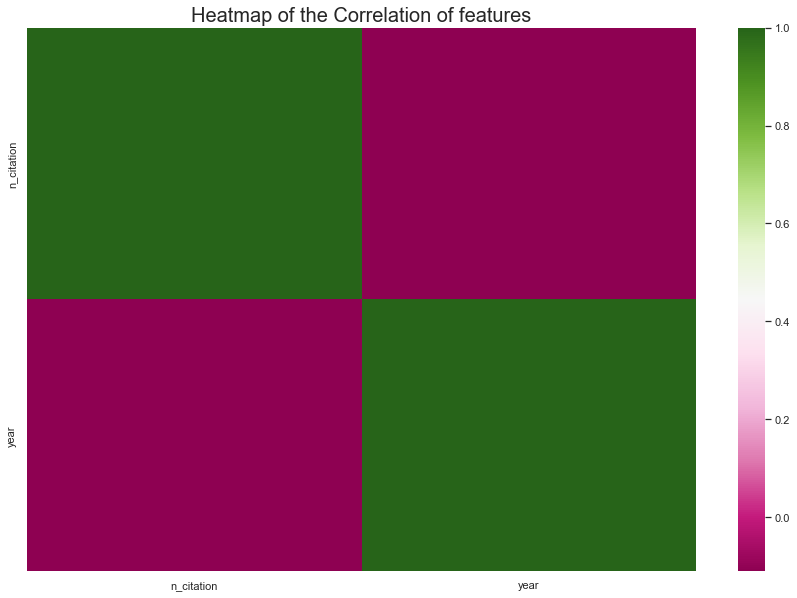

In [10]:
#heatmap figure for correlation
plt.figure(figsize = (15,10))
plt.title('Heatmap of the Correlation of features', fontsize = 20)
sns.heatmap(df.corr(), cmap = 'PiYG')
plt.show()

'n_citation' and 'year' has no relation.

In [11]:
#sorting by year
df = df.sort_values(by=['year'])
df.head()

authors  n_citation  \
29534                                ['Robert W. Bemer']          50   
23030                               ['William H. Kautz']          50   
3788   ['Robert C. Hansen', 'L. L. Bailin', 'Rudolf W...          50   
28405                                ['Mark I. Halpern']          50   
27872                                      ['W. Selden']           0   

      references                                              title  \
29534        NaN     A subroutine method for calculating logarithms   
23030        NaN  Binary and truth-function operations on a deci...   
3788         NaN                   ON COMPUTING RADIATION INTEGRALS   
28405        NaN  Variable-width tables with binary-search facility   
27872        NaN                              Need for an algorithm   

                           venue  year                                    id  \
29534  Communications of The ACM  1958  bffe8d3c-2eac-4674-8c1c-96e9fc58bab1   
23030  Communications of The ACM  1958  21bb7b07-c8dd-49ae-a743-c64082c1ed33   
3788   Communications of The ACM  1958  1f86e3cb-808d-4f1f-8577-8afb41e0ef28   
28405  Communications of The ACM  1958  a49ce88b-db8b-4bcb-a689-665aecd2345e   
27872  Communications of The ACM  1958  978ac372-a273-4380-b32b-7088c56cc3ae   

                                                abstract  
29534                                                NaN  
23030                                                NaN  
3788                                                 NaN  
28405  The family of subroutines described in this re...  
27872  As EDPM are more tightly scheduled and program...

In [12]:
#finding unique years
df_year=df['year'].unique()
print("There are ",len(df_year), " years.")
print("The unique year: ",df_year) 

There are  60  years.
The unique year:  [1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971
 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985
 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017]


From. 1958 to 2017, the duration is 60 years. So, no year is missing.

In [13]:
#how many article in each year
groups = df.groupby(['year']).count()['id']
print(groups)

year
1958      19
1959      42
1960      53
1961     166
1962     201
1963     180
1964     169
1965     154
1966     145
1967     150
1968     133
1969     142
1970     147
1971      69
1972     116
1973      93
1974      91
1975      80
1976     118
1977      83
1978     115
1979      77
1980      49
1981      85
1982      81
1983      83
1984      90
1985      94
1986      76
1987      81
1988     113
1989     198
1990     162
1991     138
1992     129
1993     213
1994     209
1995     228
1996     243
1997     902
1998    1620
1999    1446
2000    1985
2001    2719
2002    3612
2003    3678
2004    5064
2005    5056
2006    7536
2007     640
2008     607
2009     817
2010     812
2011    1162
2012    1935
2013     959
2014    2040
2015    2075
2016    2308
2017     168
Name: id, dtype: int64


In [14]:
#storing no of article per year in a list
noOfArticlePerYear = groups.values
print(noOfArticlePerYear) #from 1958 to 2017

[  19   42   53  166  201  180  169  154  145  150  133  142  147   69
  116   93   91   80  118   83  115   77   49   85   81   83   90   94
   76   81  113  198  162  138  129  213  209  228  243  902 1620 1446
 1985 2719 3612 3678 5064 5056 7536  640  607  817  812 1162 1935  959
 2040 2075 2308  168]


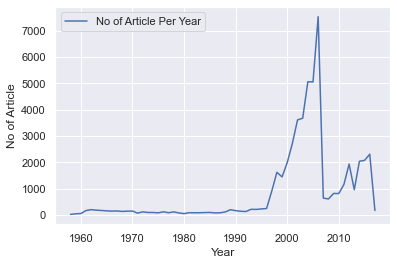

In [15]:
#ploting no of article per year
plt.plot(df_year,noOfArticlePerYear,label="No of Article Per Year")
plt.ylabel("No of Article")
plt.xlabel("Year")
plt.legend()
# Display a figure.
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


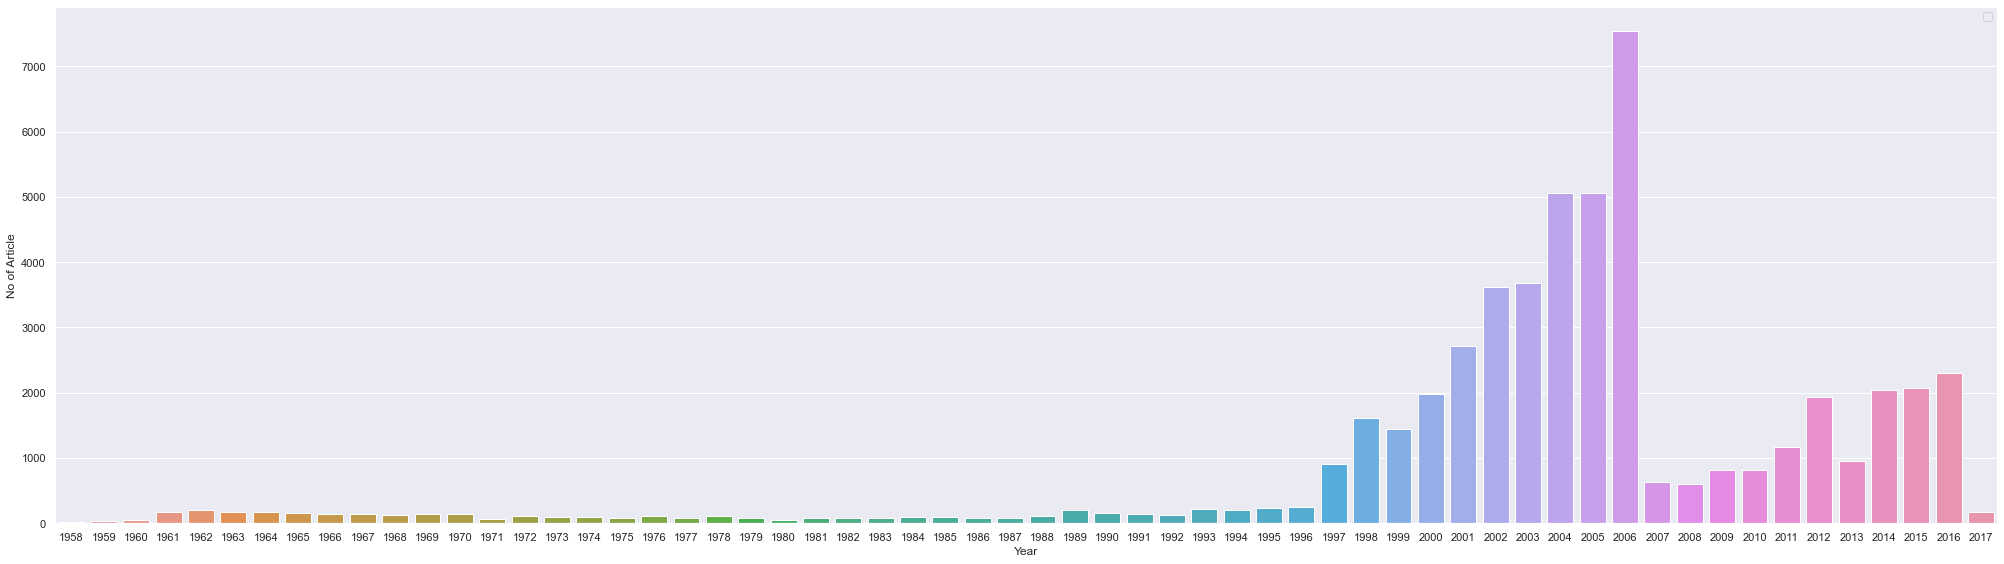

In [16]:
#ploting no of article per year in a bar plot
plt.figure(figsize = (28, 8))
splot = sns.barplot(x = df_year, y = noOfArticlePerYear)
plt.ylabel("No of Article")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()
# Display a figure.
plt.show()

From this figure, we can see that, most of the author collaboration and article publications were in 2006 which is 7536.

Data Preprocessing

We want to predict link of author collaboration through the year. So, 'vanue', 'n_citations', 'references', 'title', 'id', 'abstract' columns are not needed for preprocessing. And with that, the problem of null value adaption is solved. We only need 'authors' and 'year' columns to prediction the link between any two authors.

In [17]:
#printing unique author collab and its length
print(df['authors'].unique())
print("Unique author collaborations: ",len(df['authors'].unique()))

["['Robert W. Bemer']" "['William H. Kautz']"
 "['Robert C. Hansen', 'L. L. Bailin', 'Rudolf W. Rutishauser']" ...
 "['Yuling Luo', 'Qiang Fu', 'Junxiu Liu', 'Jim Harkin', 'Liam McDaid', 'Yi Cao', 'Ignacio Rojas', 'Gonzalo Joya', 'Andreu Català']"
 "['Erli Wang', 'Hanna Kurniawati', 'Dirk P. Kroese']" "['William Regli']"]
Unique author collaborations:  46752


In [18]:
#storing author collaboration with collaboration year in a array
listofayer=df[['authors','year']]
#print(type(listofayer))
listofayer=listofayer.to_numpy()
#print(type(listofayer))
#print(listofayer.dtype)
print(len(listofayer))
print(listofayer)

51956
[["['Robert W. Bemer']" 1958]
 ["['William H. Kautz']" 1958]
 ["['Robert C. Hansen', 'L. L. Bailin', 'Rudolf W. Rutishauser']" 1958]
 ...
 ["['Erli Wang', 'Hanna Kurniawati', 'Dirk P. Kroese']" 2017]
 ["['William Sims Bainbridge']" 2017]
 ["['William Regli']" 2017]]


Here, The authors name are not accessable, all the names are in string form and can not access a whole name with indexing. So, we have to make them accessable with year.

In [19]:
#replacing all unnessassry characters form the string list with null character.
for i in range(0,len(listofayer)):
    listofayer[i][0]=listofayer[i][0].replace('[','')
    listofayer[i][0]=listofayer[i][0].replace(' ','')
    listofayer[i][0]=listofayer[i][0].replace(']','')
    listofayer[i][0]=listofayer[i][0].replace("'",'')
print(len(listofayer))
print(type(listofayer))
print(listofayer)

51956
<class 'numpy.ndarray'>
[['RobertW.Bemer' 1958]
 ['WilliamH.Kautz' 1958]
 ['RobertC.Hansen,L.L.Bailin,RudolfW.Rutishauser' 1958]
 ...
 ['ErliWang,HannaKurniawati,DirkP.Kroese' 2017]
 ['WilliamSimsBainbridge' 2017]
 ['WilliamRegli' 2017]]


Still the name is not accessable and we have split them when we found a comma and store them in a list of list after that we can access a name by list indexing.

In [20]:
#defining two null list
bll1=[]
bll2=[]
#
for i in range(0, len(listofayer)):
    bll1.append(list(listofayer[i][0].split(','))) #spliting the values (names) with comma and storing then in bll1
    bll2.append(listofayer[i][1]) #storing the years in bll2

#with that, the collaboration list(bll1) index and collaboration year list(bll2) index will be same. 
#suppose 1 no index, in bll1 we found a author collaboration and in bll2 we can found its respective collaboration year. 

#printing the length and it should be same because coauthor has its respective year.
print('The length of collaboration year list: ',len(bll2))
print('The length of collaboration author list: ',len(bll1))

#appending the two list into one list by same indexing
for j in range(0, len(bll2)):
    bll1[j].append(bll2[j])
#bll1 has the collaboration authors name with its respective year and every name and year is accessable. 

#printing the value of 9th index
print('The 9th index:')
print('The whole list->',bll1[9])
print('1st coauthor->',bll1[9][0])
print('Collaboration year->',bll1[9][len(bll1[9])-1])#the value of year is always in the last position of every list.

print('The length of collaboration list->',len(bll1))

print(bll1)


The length of collaboration year list:  51956
The length of collaboration author list:  51956
The 9th index:
The whole list-> ['B.C.Kenny', 'J.A.Hunter', 1958]
1st coauthor-> B.C.Kenny
Collaboration year-> 1958
The length of collaboration list-> 51956
[['RobertW.Bemer', 1958], ['WilliamH.Kautz', 1958], ['RobertC.Hansen', 'L.L.Bailin', 'RudolfW.Rutishauser', 1958], ['MarkI.Halpern', 1958], ['W.Selden', 1958], ['JosephHenryWegstein', 1958], ['EdwardA.Voorhees', 1958], ['RobertW.Bemer', 1958], ['DicksonH.Call', 'RoyF.Reeves', 1958], ['B.C.Kenny', 'J.A.Hunter', 1958], ['AndreiP.Ershov', 1958], ['HaroldWolpe', 1958], ['AlanJ.Perlis', 'KlausSamelson', 1958], ['JamesB.Randels', 'RoyF.Reeves', 1958], ['W.G.Wadey', 1958], ['MervinE.Muller', 1958], ['T.A.Jeeves', 1958], ['HerbertS.Wilf', 1958], ['A.W.Holt', 1958], ['StanleyM.Humphrey', 1959], ['W.BarkleyFritz', 1959], ['DiranSarafyan', 1959], ['JohnW.Hamblen', 1959], ['RobertW.Bemer', 1959], ['MortonNadler', 'A.Sengupta', 1959], ['P.R.Bagley', 1

Here, bll1 is a list of list and every value is accessable.

We created a collaboration list which is bll1. Now we have to create a list of unique authors.

In [21]:
#unique author collaboration
listOfAuthors=df['authors'].unique()
print('The length of unique author collaboration is: ',len(listOfAuthors))

The length of unique author collaboration is:  46752


As 'listofAuthors' is a string list and the authors name is not accessable, so again we have to remove all the unnecessary characters.

In [22]:
auth_str='' #for storing all name into a string
for i in range(0, len(listOfAuthors)):
    for j in range(0,len(listOfAuthors[i])):
        #replacing special characters
        if(listOfAuthors[i][j]!='['  and listOfAuthors[i][j]!="'" and listOfAuthors[i][j]!=" "):
            if(listOfAuthors[i][j]==']'):
                auth_str=auth_str+',' #putting comma at the end for spliting
                continue #for checking further values
            auth_str=auth_str+listOfAuthors[i][j]
                

print(type(auth_str))
print(auth_str)
print(len(auth_str))

<class 'str'>
RobertW.Bemer,WilliamH.Kautz,RobertC.Hansen,L.L.Bailin,RudolfW.Rutishauser,MarkI.Halpern,W.Selden,JosephHenryWegstein,EdwardA.Voorhees,DicksonH.Call,RoyF.Reeves,B.C.Kenny,J.A.Hunter,AndreiP.Ershov,HaroldWolpe,AlanJ.Perlis,KlausSamelson,JamesB.Randels,RoyF.Reeves,W.G.Wadey,MervinE.Muller,T.A.Jeeves,HerbertS.Wilf,A.W.Holt,StanleyM.Humphrey,W.BarkleyFritz,DiranSarafyan,JohnW.Hamblen,MortonNadler,A.Sengupta,P.R.Bagley,HeinzSchecher,ScotW.Hornick,J.S.Hicks,R.F.Wheeling,BenjaminL.Schwartz,H.A.Cress,EdgarT.Irons,FormanS.Acton,NelsonM.Blachman,W.R.Brittenham,K.W.Clark,G.Kuss,H.Thompson,IrwinD.Greenwald,JohnR.Howell,WilfriedBuchholz,VirginiaNather,WardC.Sangren,DonaldL.Shell,JohnW.Carr,AlanJ.Perlis,JamesE.Robertson,NormanR.Scott,WenM.Chow,BruceW.Arden,RobertM.Graham,PhilipWolfe,FredH.Lesh,JulienGreen,WilliamH.Anderson,DonaldE.Knuth,RalphGilman,P.B.Sheridan,J.E.Powers,JackHollingsworth,WilliamF.Luebbert,PercyW.Collom,MortonNadler,RichardW.Conway,B.M.Johnson,WilliamL.Maxwell,E.F.Cod

In 'auth_str' , the names of authors is in comma speration. We have to split them.

In [23]:
#list of author (not unique)
loa=[]
loa=auth_str.split(',') #spliting when found comma and storing in a list
print(len(loa))
#print(loa)

132462


132462 is not the number of unique author. We have to uniquely identify them.

In [24]:
loau=[] #for uniquely storing all the names    
# traverse for all elements
for x in loa:
    # check if exists in unique_list or not
    if x not in loau:
        loau.append(x)
print('There are ',len(loau), ' unique authors.')

There are  80290  unique authors.


Now, we have to create a 2D matrix with 4 columns name 'author_1', 'author_2' 'collab_label' and 'year'. And store the collaboration pair with its according year. We won't store author name in the matrix, we will store the author index value which is unique for each author from 'loau' list. We will find collaboration for one author from 'bll1' and store his/her coauthor (excepts his/her own name) with their collaboration year and put 1 in as collab_label.  

In [25]:
#finding and storing collaboration pair (index value from 'loau') with year 
v='' #for marking a author name
matrix=[] #for storing the collaboration pair
for m in range(0, len(loau)): #searching collaboration pair for each unique author
    v=loau[m] 
    kk=m #remembering the index value of the unique author
    vv='' ##for marking its coauthor name
    for i in range(0,len(bll1)): #searching the whole collaboration list
        for j in range (0, len(bll1[i])-1): #search each and every nested list of bll1 but except the year value (which is in the last position of every  nested list)
            if(v==bll1[i][j] and len(bll1[i])>2): #finding the unique author name in the nested list and also the list should be larger than 2 size because we need coauthor name.
                for k in range (len(bll1[i])-1): #for picking up the coauthor name
                    if(v==bll1[i][k]):
                        continue #excepts the unique authors name
                    vv=bll1[i][k] #storing coauthor name
                    for p in range(0, len(loau)): #for finding that coauthors index value form the 'loau' list
                        if(vv==loau[p]):
                            a=[] #temporary list for storing the values
                            #appending the unique author index, coauthor index, collab_label and year                     
                            a.append(kk)
                            a.append(p)
                            a.append(1)
                            a.append(bll1[i][len(bll1[i])-1]) #year is in the last position of every nested list
                            matrix.append(a) #append the 'a' list into a big list
                            #thus way the loop continues untill it searches for all the unique authors
                            
                        
#after conducting the loop, the collaboration is stored in 'matrix'                           
arr=np.array(matrix) #we converted the list of list into a numpy array
                

This process takes a while to fully conduct. We can not afford time for every execution of our program. So we store the collaboration in a seperate csv file for further excecution without any delay. 

In [26]:
print('Total collaboration is: ',len(arr))
print(arr)

Total collaboration is:  359826
[[    0   109     1  1961]
 [    0   110     1  1961]
 [    0    73     1  1963]
 ...
 [80286 80287     1  2017]
 [80287 80286     1  2017]
 [80287 61649     1  2017]]


We can see that, the collaboration for every author is stored successfully.

In [27]:
#creating dataframe of collaboration array
acnuvs = pd.DataFrame(arr, columns = ['author_1','author_2','collab_label','year'])

In [28]:
#printing the dataframe
acnuvs

author_1  author_2  collab_label  year
0              0       109             1  1961
1              0       110             1  1961
2              0        73             1  1963
3              0        57             1  1963
4              0       578             1  1964
...          ...       ...           ...   ...
359821     80285     15442             1  2017
359822     80286     61649             1  2017
359823     80286     80287             1  2017
359824     80287     80286             1  2017
359825     80287     61649             1  2017

[359826 rows x 4 columns]

In [29]:
#storing the dataframe into a seperate csv file
acnuvs.to_csv('author_collab_JN_not_unique.csv',sep=',',index=False)

in this file a collaboration can be repeated. For avoiding much complexity we have to unique the array.

In [30]:
#unique the collaboration array
arru=np.unique(arr,axis=0)
print(len(arru))

341038


In [31]:
#creating dataframe of unique collaboration array
acuvs = pd.DataFrame(arru, columns = ['author_1','author_2','collab_label','year'])
print(acuvs.shape)
#storing the dataframe into a seperate csv file
acuvs.to_csv('author_collab_JN_unique.csv',sep=',',index=False)

(341038, 4)


So, 'author_collab_JN_unique.csv' is the final csv file that we can directly fit into a ML model. But in this file there only one class lebel which is 1 and 1 means 'they collabed' but we got no zero values. We do not want to overfeed our ML models and because of that our ML model can predict wrong but it will show 100% accuracy.

So, we have to store some zero values into another file which is called non-collaboration array list. To make that list, we will go 1..2 hop form the coauthor index of its author and check that the author was collabed with in those range or not. This psychology is kind of similar of our graph database method. If it finds that the author did collab from it initial coauthor's 1..2 hop range it will not store the value cause it already stored in collaboration file. And if it did not find any then it will store the author index with it non-coauthor index alongside the collab_label as '0' and null string for year.

In [32]:
#for non collab storing
mat=[] 
for l in range(0,len(arr)): #for each author
    x=arr[l][0] #storing the author index
    
    b=[] #for storing the author's coauthors index values
    for i in range(0,len(arr)): 
        if(x==arr[i][0]): #finding the coauthor index
            b.append(arr[i][1]) 

    l=l+len(b) #for shorten up the complexity because an author is repeated with the number of its coauthors number
    for j in range(0,len(b)): 
        y1=b[j]+1 #for 1 hop
        y2=b[j]+2 #for 2 hop
        f=0
        g=0
        
        for k in range(0,len(b)):
            if(y1==b[k]): #checking the coauthor existed in one hop
                f=1
        a=[] #a temporary list
        if(f==1):
            #print('found')
            c=0
        elif(f==0): #if not found then append the non collab pair
            a.append(x)
            a.append(y1)
            a.append(0)
            a.append('') #null year
            mat.append(a) #storing the non coauthor collaboration in a big list
        for k in range(0,len(b)):
            if(y2==b[k]): #checking the coauthor existed in two hop
                g=1
        a=[] #a temporary list
        if(g==1):
            c=0
        elif(g==0): #if not found then append the non collab pair
            a.append(x)
            a.append(y2)
            a.append(0)
            a.append('') #null year
            mat.append(a) #storing the non coauthor collaboration in a big list
        

#mat
len(mat)

This process also takes a while to exceute so we have to make a seperate file for this too.

In [ ]:
mat1=np.array(mat) #making numpy array
print(len(mat1))

In [ ]:
#creating dataframe and csv file
zero=pd.DataFrame(mat1, columns = ['author_1','author_2','collab_label','year'])
zero.to_csv('author_non_collab_JN_unique.csv',sep=',',index=False)

So this 'author_non_collab_JN_unique.csv' file is for non collaboration. And now with this two files we will learn them to different ML models. The rest of the work is in seperate ipynb file.